In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
sns.set_style('darkgrid')
plt.style.use('fivethirtyeight')
print("The necessary packages are included successfully!")

The necessary packages are included successfully!


In [2]:
url = "https://raw.githubusercontent.com/benvictoria17/DataVisualization/master/dataset/Coursera.csv"
df = pd.read_csv(url)
df.head()

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...


In [3]:
uc = ["Course URL"]
df = df.drop(columns=uc)
df.head()

,Course Name,University,Difficulty Level,Course Rating,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,Intermediate,4.8,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...


In [4]:
r,c = df.shape
print("Number of customers = ", r)
print("Number of parameters = ", c)

Number of customers =  3522
Number of parameters =  6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3522 entries, 0 to 3521
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Course Name         3522 non-null   object
 1   University          3522 non-null   object
 2   Difficulty Level    3522 non-null   object
 3   Course Rating       3522 non-null   object
 4   Course Description  3522 non-null   object
 5   Skills              3522 non-null   object
dtypes: object(6)
memory usage: 165.2+ KB


In [6]:
print("Are there any missing values in the dataset ?",df.isna().values.any())

Are there any missing values in the dataset ? False


In [7]:
df.describe().T

,count,unique,top,freq
Course Name,3522,3416,Google Cloud Platform Fundamentals: Core Infra...,8
University,3522,184,Coursera Project Network,562
Difficulty Level,3522,5,Beginner,1444
Course Rating,3522,31,4.7,740
Course Description,3522,3397,This course introduces you to important concep...,8
Skills,3522,3424,Google Cloud Platform Big Data Cloud Infrast...,8


In [8]:
data = df["Difficulty Level"].value_counts()
data

Beginner          1444
Advanced          1005
Intermediate       837
Conversant         186
Not Calibrated      50
Name: Difficulty Level, dtype: int64

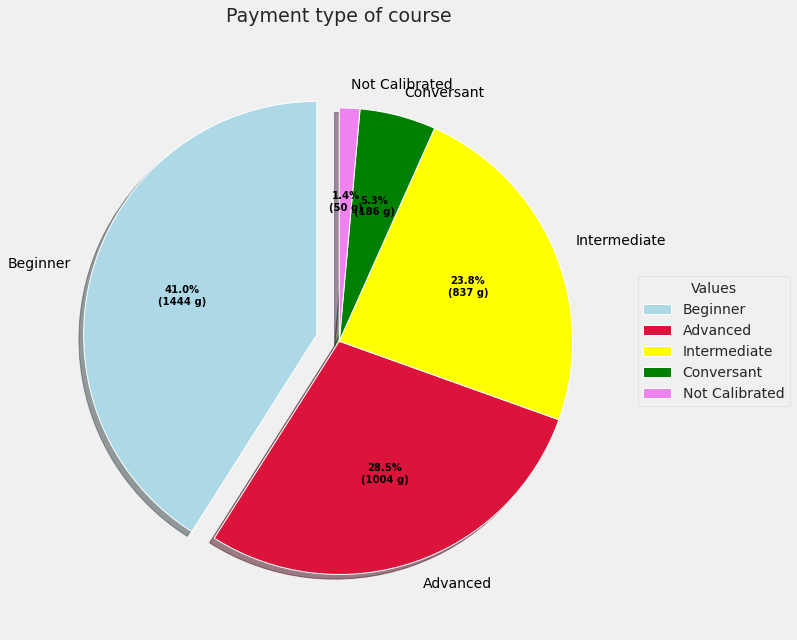

4.7               740
4.6               623
4.8               598
4.5               389
4.4               242
4.9               180
4.3               165
4.2               121
5                  90
4.1                85
Not Calibrated     82
4                  51
3.8                24
3.9                20
3.6                18
3.7                18
3.5                17
3.4                13
3                  12
3.2                 9
3.3                 6
2.9                 6
2.6                 2
2.8                 2
2.4                 2
1                   2
2                   1
3.1                 1
2.5                 1
1.9                 1
2.3                 1
Name: Course Rating, dtype: int64

In [9]:
mag = ['Beginner','Advanced','Intermediate','Conversant','Not Calibrated']
  
data = [1444,1005,837,186,50]
explode = (0.1,0.0,0.0,0.0,0.0) 
  
colors = ("lightblue","crimson","yellow","green","violet") 
  
wp = { 'linewidth' : 1, 'edgecolor' : "white" } 
  
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d} g)".format(pct, absolute) 
  
fig, ax = plt.subplots(figsize =(15, 10)) 
wedges, texts, autotexts = ax.pie(data,  
                                  autopct = lambda pct: func(pct, data), 
                                  explode = explode,  
                                  labels = mag, 
                                  shadow = True, 
                                  colors = colors, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="black")) 
  
ax.legend(wedges, mag, 
          title ="Values", 
          loc ="center left", 
          bbox_to_anchor =(1, 0, 0.5, 1)) 
  
plt.setp(autotexts, size = 10, weight ="bold") 
ax.set_title("Payment type of course\n",size=19) 
  

plt.show()

df['Course Rating'].value_counts()

In [10]:
df = df[df['Course Rating'] != 'Not Calibrated']
df['Course Rating'] = df['Course Rating'].astype(float)
df

,Course Name,University,Difficulty Level,Course Rating,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,Intermediate,4.8,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...
...,...,...,...,...,...,...
3517,"Capstone: Retrieving, Processing, and Visualiz...",University of Michigan,Beginner,4.6,"In the capstone, students will build a series ...",Databases syntax analysis web Data Visuali...
3518,Patrick Henry: Forgotten Founder,University of Virginia,Intermediate,4.9,"�Give me liberty, or give me death:� Rememberi...",retirement Causality career history of the ...
3519,Business intelligence and data analytics: Gene...,Macquarie University,Advanced,4.6,�Megatrends� heavily influence today�s organis...,analytics tableau software Business Intellig...
3520,Rigid Body Dynamics,Korea Advanced Institute of Science and Techno...,Beginner,4.6,"This course teaches dynamics, one of the basic...",Angular Mechanical Design fluid mechanics F...


Text(0.5, 1.0, 'Count of course types\n')

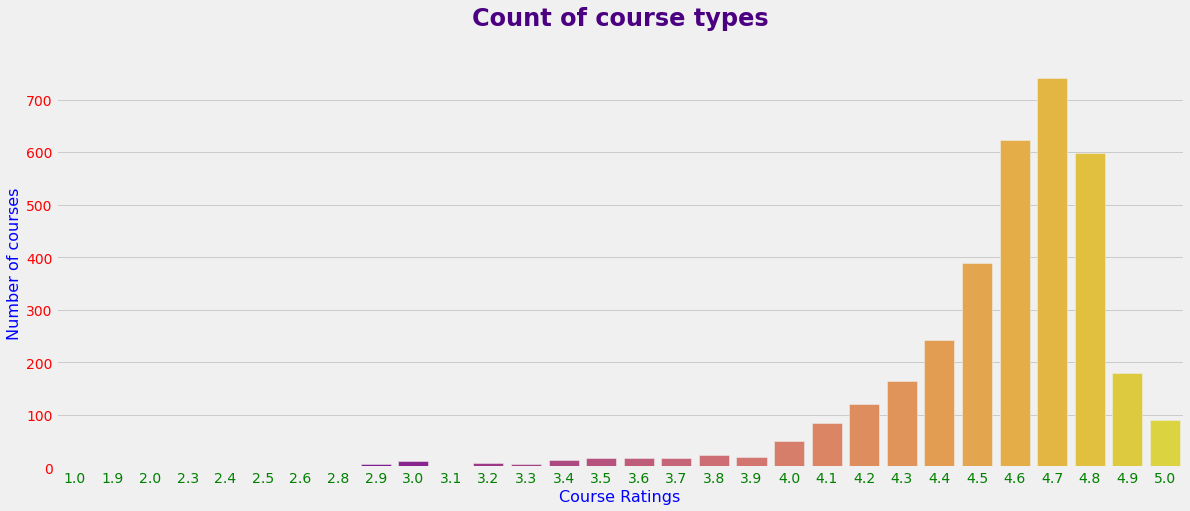

In [11]:
plt.figure(figsize=(18,7))
sns.countplot(data=df,x='Course Rating',palette='plasma')
plt.xlabel('Course Ratings',fontsize='16',color='blue')
plt.ylabel('Number of courses',fontsize='16',color='blue')
plt.xticks(fontsize='14',color='green')
plt.yticks(fontsize='14',color='red')
plt.title("Count of course types\n",fontsize=24,fontweight='bold',color='indigo')

In [12]:
df2 = df[df['Course Rating'] > 4.0]
df2.head(10)

,Course Name,University,Difficulty Level,Course Rating,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,Intermediate,4.8,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...
5,Building Test Automation Framework using Selen...,Coursera Project Network,Beginner,4.7,Selenium is one of the most widely used functi...,maintenance test case test automation scree...
7,"Programming Languages, Part A",University of Washington,Intermediate,4.9,This course is an introduction to the basic co...,inference ml (programming language) higher-o...
8,The Roles and Responsibilities of Nonprofit Bo...,The State University of New York,Intermediate,4.3,This course provides a more in-depth look at t...,Planning Peer Review fundraising strategic ...
11,Esports Management Capstone Project,"University of California, Irvine",Beginner,4.4,We will analyze the pros and cons of creating ...,Average Planning Leadership and Management ...
13,Business Statistics and Analysis Capstone,Rice University,Beginner,4.7,The Business Statistics and Analysis Capstone ...,Statistical Analysis Microsoft Excel busines...


In [13]:
cv=TfidfVectorizer()
tfidf_matrix=cv.fit_transform(df['Course Name'])
course_user = df.pivot_table(columns='Course Name',values='Course Rating')
course_user.head()

Course Name,"""Making"" Progress Teach-Out",3-Axis Machining with Autodesk Fusion 360,3D Art and Audio Pipeline,3D CAD Application,3D CAD Fundamental,3D Data Visualization for Science Communication,3D Graphics in Android: Sensors and VR,3D Interaction Design in Virtual Reality,3D Interactions and Navigation,3D Model Creation with Autodesk Fusion 360,...,Writing in English at University,Writing in First Person Point of View,Writing your World: Finding yourself in the academic space,e-Learning Ecologies: Innovative Approaches to Teaching and Learning for the Digital Age,eHealth: More than just an electronic record,iOS App Development Basics,iOS App Store & In-App Purchases,iOS Project: Transreality Game,iPad Music Player in XD,idea 2 IMPACT: An Introduction to Translating Assistive Health Technologies and Other Products
Course Rating,4.2,4.9,4.3,4.9,4.6,4.3,4.6,4.5,4.5,4.7,...,4.7,4.6,4.7,4.2,4.5,4.2,4.5,4.9,4.4,1.0


In [14]:
df = df.rename(columns={'Course Name':'course_title'})

In [15]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
indices=pd.Series(df.index,index=df['course_title'])
titles=df['course_title']
def recommendations(course_title):
    idx = indices[course_title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    course_indices = [i[0] for i in sim_scores]
    return titles.iloc[course_indices]
print("--------------- Similar courses to your search --------------:\n")
recommendations('Write A Feature Length Screenplay For Film Or Television')

--------------- Similar courses to your search --------------:



149                      Scandinavian Film and Television
2485                                  Feature Engineering
1481    Script Writing: Write a Pilot Episode for a TV...
2858         Machine Learning Feature Selection in Python
3070            Perform Feature Analysis with Yellowbrick
1854    Data Processing and Feature Engineering with M...
1629                               Write Your First Novel
650                  Write Professional Emails in English
2385                     Getting Your Film off the Ground
2472    Python: Imputations, Feature Creation & Statis...
Name: course_title, dtype: object

In [16]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
indices=pd.Series(df.index,index=df['course_title'])
titles=df['course_title']
def recommendations(course_title):
    idx = indices[course_title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    course_indices = [i[0] for i in sim_scores]
    return titles.iloc[course_indices]
print("--------------- Similar courses to your search --------------:\n")
recommendations('Retrieve Data using Single-Table SQL Queries')

--------------- Similar courses to your search --------------:



3272        Retrieve Data with Multiple-Table SQL Queries
1162       Advanced SQL Retrieval Queries in SQLiteStudio
1580                                 SQL for Data Science
3482                SQL for Data Science Capstone Project
2892                           Manipulating Data with SQL
2611                          Analyzing Big Data with SQL
2934    How to Design a Space-Saving Table Using SketchUp
1033                   Databases and SQL for Data Science
1379                   Databases and SQL for Data Science
1380                   Databases and SQL for Data Science
Name: course_title, dtype: object

In [17]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
indices=pd.Series(df.index,index=df['course_title'])
titles=df['course_title']
def recommendations(course_title):
    idx = indices[course_title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    course_indices = [i[0] for i in sim_scores]
    return titles.iloc[course_indices]
print("--------------- Similar courses to your search --------------:\n")
recommendations('Finance for Managers')

--------------- Similar courses to your search --------------:



419                    Finance for Non-Financial Managers
2082                Finance for Non-Finance Professionals
3448                                 Finance for Startups
3094    Coding for Designers, Managers, & Entrepreneurs I
653     Coding for Designers, Managers, & Entrepreneur...
1659    Coding for Designers, Managers, & Entrepreneur...
2851                        Finance for Everyone: Markets
3110                          Finance For Everyone: Value
959                 Finance for Everyone Capstone Project
2188    Human Resources Management Capstone: HR for Pe...
Name: course_title, dtype: object